In [1]:
# Question 1: Which cities love avocados most?

#Task 1: popularity of avocado, visual heatmap, 2015 to 2020, bar graph of volume per area 

In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
#read initial csv into a dataframe
csv_file = 'Main Avocado Tree (Resources)/avocado-updated-2020.csv'
avocado_df = pd.read_csv(csv_file)
avocado_df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


##Trying to use the avocado data to get the full geography data 

In [14]:
avocado_cities=avocado_df[avocado_df.geography != 'Total U.S.']
bad_geos = ['Baltimore/Washington', 'Buffalo/Rochester', 'California', 'Cincinnati/Dayton', 'Dallas/Ft. Worth', 'Harrisburg/Scranton', 'Hartford/Springfield', 'Miami/Ft. Lauderdale', 'Midsouth', 'New Orleans/Mobile', 'Northeast', 'Northern New England', 'Phoenix/Tucson','Raleigh/Greensboro', 'Richmond/Norfolk', 'Southeast', 'West', 'West Tex/New Mexico', 'Great Lakes', 'South Central', 'Plains']


In [15]:
new_avocado = avocado_cities[~avocado_cities['geography'].isin(bad_geos)]
new_avocado

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
6,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,conventional,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33034,2020-11-29,1.84,5898.33,677.71,912.70,0.00,4307.92,4301.25,6.67,0.00,organic,2020,St. Louis
33035,2020-11-29,0.95,72128.91,6789.51,31201.09,627.87,33510.44,20587.54,11866.23,1056.67,conventional,2020,Syracuse
33036,2020-11-29,1.46,3191.59,166.36,89.78,0.00,2935.45,2618.57,316.88,0.00,organic,2020,Syracuse
33037,2020-11-29,0.65,562437.35,230468.94,15289.83,44.60,316633.98,251658.97,64927.71,47.30,conventional,2020,Tampa


In [16]:
#Changing Date to ONLY reflect the month
split_col = new_avocado['date'].str.split('-',expand=True)
split_col.columns = [f'Split-{i}' for i in range(3)]
newer_avocado = new_avocado.join(split_col)
newer_avocado

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,Split-0,Split-1,Split-2
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,2015,01,04
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,2015,01,04
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,2015,01,04
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,2015,01,04
6,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,conventional,2015,Boise,2015,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33034,2020-11-29,1.84,5898.33,677.71,912.70,0.00,4307.92,4301.25,6.67,0.00,organic,2020,St. Louis,2020,11,29
33035,2020-11-29,0.95,72128.91,6789.51,31201.09,627.87,33510.44,20587.54,11866.23,1056.67,conventional,2020,Syracuse,2020,11,29
33036,2020-11-29,1.46,3191.59,166.36,89.78,0.00,2935.45,2618.57,316.88,0.00,organic,2020,Syracuse,2020,11,29
33037,2020-11-29,0.65,562437.35,230468.94,15289.83,44.60,316633.98,251658.97,64927.71,47.30,conventional,2020,Tampa,2020,11,29


In [17]:
#make it pretty
final_avocado = newer_avocado.rename(columns={'Split-1':'month', 'geography':'city'})
clean_avocado = final_avocado[['month', 'year', 'city', 'average_price', 'total_volume', '4046', '4225', '4770', 'type']]
clean_avocado.head()

,month,year,city,average_price,total_volume,4046,4225,4770,type
0,01,2015,Albany,1.22,40873.28,2819.50,28287.42,49.90,conventional
1,01,2015,Albany,1.79,1373.95,57.42,153.88,0.00,organic
2,01,2015,Atlanta,1.00,435021.49,364302.39,23821.16,82.15,conventional
3,01,2015,Atlanta,1.76,3846.69,1500.15,938.35,0.00,organic
6,01,2015,Boise,1.01,80034.32,44562.12,24964.23,2752.35,conventional


In [18]:
grouped_year_city = pd.DataFrame(clean_avocado.groupby(["city", "year"]).mean().round(2))
grouped_year_city

average_price  total_volume       4046      4225     4770
city   year                                                           
Albany 2015           1.54      38749.00     534.97  30959.87   334.40
       2016           1.53      50618.61    2717.87  39807.86    32.30
       2017           1.64      49354.55    1608.51  39712.43   151.47
       2018           1.45      64017.27    5076.33  47879.76    49.18
       2019           1.43      62896.96    2294.52  51627.03   135.17
...                    ...           ...        ...       ...      ...
Tampa  2016           1.26     208468.74   89255.50  47830.63    48.57
       2017           1.62     193869.22  113704.23  27695.45   111.01
       2018           1.31     273352.89  167546.43  20813.41   710.79
       2019           1.14     299179.74  117290.64   9835.28  1611.04
       2020           1.09     326690.70  133730.07  10688.41   251.75

[192 rows x 5 columns]

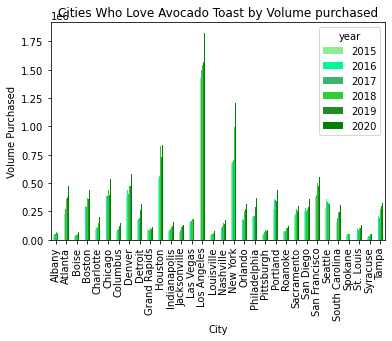

In [22]:
grouped_year_city['total_volume'].unstack().plot(kind='bar', color=('lightgreen', 'mediumspringgreen', 'mediumseagreen', 'limegreen', 'forestgreen', 'green'))
plt.xlabel("City")
plt.xticks(rotation=90)
plt.ylabel("Volume Purchased")
plt.title("Cities Who Love Avocado Toast by Volume purchased")

plt.show()

In [30]:
Bad_year= [2015, 2016, 2017, 2018, 2020]
Only_2019 = clean_avocado[~clean_avocado['year'].isin(Bad_year)]
Only_2019

,month,year,city,average_price,total_volume,4046,4225,4770,type
22245,01,2019,Albany,1.07,129222.29,3789.30,112635.18,158.00,conventional
22246,01,2019,Albany,1.41,5006.34,31.85,624.66,0.00,organic
22247,01,2019,Atlanta,0.92,828971.15,388574.98,38902.85,3482.04,conventional
22248,01,2019,Atlanta,1.42,16714.19,265.17,4554.23,0.00,organic
22251,01,2019,Boise,1.23,108261.98,43723.19,7085.86,14435.46,conventional
...,...,...,...,...,...,...,...,...,...
27850,12,2019,St. Louis,2.08,6668.43,819.88,1920.62,0.00,organic
27851,12,2019,Syracuse,1.12,67860.40,2800.47,39432.09,51.00,conventional
27852,12,2019,Syracuse,1.32,2658.63,127.03,143.60,0.00,organic
27853,12,2019,Tampa,0.84,673884.40,228420.96,20786.42,1569.02,conventional


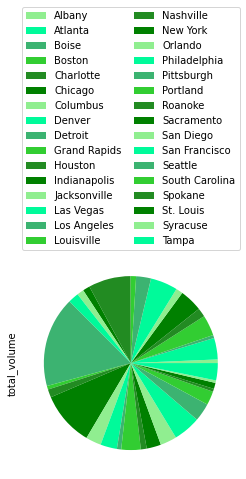

In [53]:
Only_2019.groupby(['city']).sum().plot(kind='pie', y='total_volume', labeldistance=None, colors=('lightgreen', 'mediumspringgreen', 'mediumseagreen', 'limegreen', 'forestgreen', 'green'))
#plt.xlabel("City")
#plt.xticks(rotation=90)
#plt.ylabel("Volume Purchased")
#plt.title("Cities Who Love Avocado Toast by Volume purchased")
plt.legend(bbox_to_anchor=(0,1.02,1,.102), loc=3, ncol=2, mode="expand", borderaxespad=0)
plt.show()

In [63]:
essential_2019 = Only_2019[['city', 'total_volume']]
essential_2019

,city,total_volume
22245,Albany,129222.29
22246,Albany,5006.34
22247,Atlanta,828971.15
22248,Atlanta,16714.19
22251,Boise,108261.98
...,...,...
27850,St. Louis,6668.43
27851,Syracuse,67860.40
27852,Syracuse,2658.63
27853,Tampa,673884.40


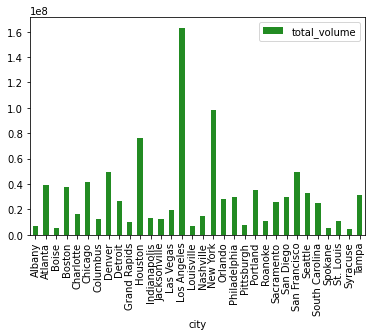

In [64]:
essential_2019.groupby(['city']).sum().plot(kind='bar', color='forestgreen')
#plt.xlabel("City")
#plt.xticks(rotation=90)
#plt.ylabel("Volume Purchased")
#plt.title("Cities Who Love Avocado Toast by Volume purchased")
plt.show()

In [54]:
#read initial csv into a dataframe
csv_file2 = 'Main Avocado Tree (Resources)/worldcities.csv'
pop_df = pd.read_csv(csv_file2)
pop_df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
15488,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
15489,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
15490,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159
15491,Nordvik,Nordvik,74.0165,111.5100,Russia,RU,RUS,Krasnoyarskiy Kray,NaN,0.0,1643587468


In [55]:
#Merge the two dataframes together on Geography and year
avocado_pop = pd.merge(Only_2019, pop_df, on=['city'], how='inner')
avocado_pop

,month,year,city,average_price,total_volume,4046,4225,4770,type,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,01,2019,Albany,1.07,129222.29,3789.30,112635.18,158.00,conventional,Albany,42.6664,-73.7987,United States,US,USA,New York,admin,597270.0,1840000417
1,01,2019,Albany,1.07,129222.29,3789.30,112635.18,158.00,conventional,Albany,37.8898,-122.3018,United States,US,USA,California,NaN,20143.0,1840028140
2,01,2019,Albany,1.07,129222.29,3789.30,112635.18,158.00,conventional,Albany,31.5776,-84.1762,United States,US,USA,Georgia,NaN,90515.0,1840013864
3,01,2019,Albany,1.07,129222.29,3789.30,112635.18,158.00,conventional,Albany,44.6275,-123.0966,United States,US,USA,Oregon,NaN,60795.0,1840018605
4,01,2019,Albany,1.07,129222.29,3789.30,112635.18,158.00,conventional,Albany,-35.0169,117.8916,Australia,AU,AUS,Western Australia,NaN,26445.0,1036047365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6963,12,2019,Tampa,1.15,7519.13,133.57,0.00,0.00,organic,Tampa,27.9942,-82.4451,United States,US,USA,Florida,NaN,2804240.0,1840015982
6964,12,2019,Tampa,0.87,549492.11,219246.58,13959.85,1686.81,conventional,Tampa,27.9942,-82.4451,United States,US,USA,Florida,NaN,2804240.0,1840015982
6965,12,2019,Tampa,1.16,7359.48,221.71,0.00,0.00,organic,Tampa,27.9942,-82.4451,United States,US,USA,Florida,NaN,2804240.0,1840015982
6966,12,2019,Tampa,0.84,673884.40,228420.96,20786.42,1569.02,conventional,Tampa,27.9942,-82.4451,United States,US,USA,Florida,NaN,2804240.0,1840015982


In [58]:
cleaned_avocado_pop = avocado_pop[['month', 'year', 'city', 'population', 'average_price', 'total_volume', '4046', '4225', '4770', 'type']]
cleaned_avocado_pop

,month,year,city,population,average_price,total_volume,4046,4225,4770,type
0,01,2019,Albany,597270.0,1.07,129222.29,3789.30,112635.18,158.00,conventional
1,01,2019,Albany,20143.0,1.07,129222.29,3789.30,112635.18,158.00,conventional
2,01,2019,Albany,90515.0,1.07,129222.29,3789.30,112635.18,158.00,conventional
3,01,2019,Albany,60795.0,1.07,129222.29,3789.30,112635.18,158.00,conventional
4,01,2019,Albany,26445.0,1.07,129222.29,3789.30,112635.18,158.00,conventional
...,...,...,...,...,...,...,...,...,...,...
6963,12,2019,Tampa,2804240.0,1.15,7519.13,133.57,0.00,0.00,organic
6964,12,2019,Tampa,2804240.0,0.87,549492.11,219246.58,13959.85,1686.81,conventional
6965,12,2019,Tampa,2804240.0,1.16,7359.48,221.71,0.00,0.00,organic
6966,12,2019,Tampa,2804240.0,0.84,673884.40,228420.96,20786.42,1569.02,conventional


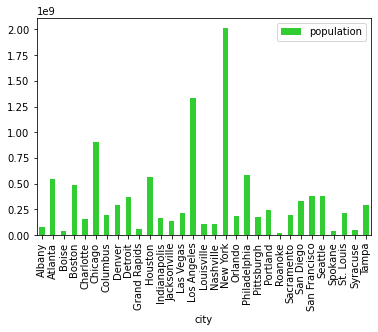

In [68]:
#first look at population sizes:
essential_population = cleaned_avocado_pop[["city", "population"]]
essential_population.groupby(['city']).sum().plot(kind='bar', color='limegreen')
#plt.xlabel("City")
#plt.xticks(rotation=90)
#plt.ylabel("Volume Purchased")
#plt.title("Cities Who Love Avocado Toast by Volume purchased")
plt.show()

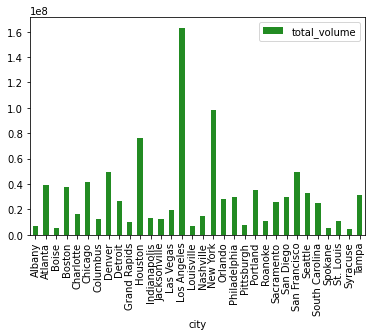

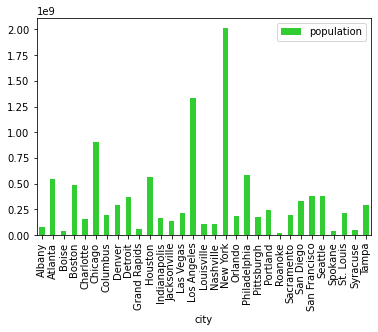

In [67]:
#Side by side comparison
essential_2019.groupby(['city']).sum().plot(kind='bar', color='forestgreen')
essential_population.groupby(['city']).sum().plot(kind='bar', color='limegreen')

plt.show()

In [ ]:
#avocado sales
#population
